In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [3]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
match1 = df2[(df2['team1'] == 'Rajasthan Royals') & (df2['team2'] == 'Sunrisers Hyderabad')]
match2 = df2[(df2['team1'] == 'Sunrisers Hyderabad') & (df2['team2'] == 'Rajasthan Royals')]

Match1 = Rajasthan Home Ground

Match2 = Hyderabad Home Ground

# Overall Hyderabad vs Rajasthan:

In [5]:
match = pd.concat((match1,match2))
match.head()

id  season       city        date                team1  \
639   7897    2018  Hyderabad    09/04/18     Rajasthan Royals   
703  11144    2019  Hyderabad    29/03/19     Rajasthan Royals   
415    416    2013     Jaipur  2013-04-27  Sunrisers Hyderabad   
448    449    2013  Hyderabad  2013-05-17  Sunrisers Hyderabad   
454    455    2013      Delhi  2013-05-22  Sunrisers Hyderabad   

                   team2          toss_winner toss_decision  result  \
639  Sunrisers Hyderabad  Sunrisers Hyderabad         field  normal   
703  Sunrisers Hyderabad     Rajasthan Royals           bat  normal   
415     Rajasthan Royals  Sunrisers Hyderabad           bat  normal   
448     Rajasthan Royals  Sunrisers Hyderabad           bat  normal   
454     Rajasthan Royals  Sunrisers Hyderabad           bat  normal   

     dl_applied               winner  win_by_runs  win_by_wickets  \
639           0  Sunrisers Hyderabad            0               9   
703           0  Sunrisers Hyderabad            0               5   
415           0     Rajasthan Royals            0               8   
448           0  Sunrisers Hyderabad           23               0   
454           0     Rajasthan Royals            0               4   

    player_of_match                                      venue  \
639        S Dhawan  Rajiv Gandhi International Stadium, Uppal   
703     Rashid Khan         Rajiv Gandhi Intl. Cricket Stadium   
415     JP Faulkner                     Sawai Mansingh Stadium   
448        A Mishra  Rajiv Gandhi International Stadium, Uppal   
454        BJ Hodge                           Feroz Shah Kotla   

            umpire1          umpire2               umpire3  
639     Nigel Llong  Vineet Kulkarni              O Nandan  
703  Bruce Oxenford    C Shamshuddin  KN Anantapadmanabhan  
415     VA Kulkarni        K Srinath                   NaN  
448       Asad Rauf     AK Chaudhary                   NaN  
454          S Ravi        RJ Tucker                   NaN

Matches played between Hyderabad and Rajasthan.

In [6]:
match.shape

(11, 18)

In [7]:
match['winner'].value_counts()

Sunrisers Hyderabad    6
Rajasthan Royals       5
Name: winner, dtype: int64

In [8]:
match['winner'].value_counts().plot.bar()
plt.show()

Hyderabad won 6 times and Rajasthan won 5 times against each other.

In [9]:
match['toss_winner'].value_counts()

Rajasthan Royals       6
Sunrisers Hyderabad    5
Name: toss_winner, dtype: int64

In [10]:
match['toss_decision'].value_counts()

field    6
bat      5
Name: toss_decision, dtype: int64

In [11]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Sunrisers Hyderabad    3
Rajasthan Royals       3
Name: winner, dtype: int64

In [12]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

Both won the toss and won the match 3 times. So winning toss doesn't have much affect to winning the match.

In [13]:
ids = list(match['id'])
delivery = df1[df1['match_id'].isin(ids)]
delivery.head()

match_id  inning         batting_team      bowling_team  over  ball  \
98439       416       1  Sunrisers Hyderabad  Rajasthan Royals     1     1   
98440       416       1  Sunrisers Hyderabad  Rajasthan Royals     1     2   
98441       416       1  Sunrisers Hyderabad  Rajasthan Royals     1     3   
98442       416       1  Sunrisers Hyderabad  Rajasthan Royals     1     4   
98443       416       1  Sunrisers Hyderabad  Rajasthan Royals     1     5   

        batsman non_striker      bowler  is_super_over  ...  bye_runs  \
98439  PA Reddy    S Dhawan  A Chandila              0  ...         0   
98440  PA Reddy    S Dhawan  A Chandila              0  ...         0   
98441  PA Reddy    S Dhawan  A Chandila              0  ...         0   
98442  PA Reddy    S Dhawan  A Chandila              0  ...         0   
98443  PA Reddy    S Dhawan  A Chandila              0  ...         0   

       legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
98439            0            0             0             0           0   
98440            0            0             0             0           0   
98441            0            0             0             2           0   
98442            0            0             0             0           0   
98443            0            0             0             0           0   

       total_runs  player_dismissed dismissal_kind    fielder  
98439           0               NaN            NaN        NaN  
98440           0               NaN            NaN        NaN  
98441           2               NaN            NaN        NaN  
98442           0               NaN            NaN        NaN  
98443           0          PA Reddy         caught  SR Watson  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Hyderabad and Rajasthan.

In [14]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## How many balls Rashid will take to get his first wicket:

In [15]:
ball_list = []
ids1 = delivery[delivery['bowler']=='Rashid Khan']['match_id'].unique()
for j in ids1:
    dismissal_kind = list(delivery[(delivery['match_id']==j) & (delivery['bowler'] == 'Rashid Khan')]['dismissal_kind'])
    wide_runs = list(delivery[(delivery['match_id']==j) & (delivery['bowler'] == 'Rashid Khan')]['wide_runs'])
    noball_runs = list(delivery[(delivery['match_id']==j) & (delivery['bowler'] == 'Rashid Khan')]['noball_runs'])
    counter = 0
    for i in dismissal_kind:
        counter += 1
        if i in (['caught','bowled','lbw','caught and bowled','stumped']):
            break
    ball = 0
    for i in range(0,counter):
        if noball_runs[i] != 0:
            ball -= 1
        elif wide_runs[i] != 0:
            ball -= 1
        else:
            ball += 1
    if ball > 0:
        ball_list.append(ball)
ball_list

[20, 12, 2, 13]

Rashid Khan played only 4 matches against Hyderabad and took these many balls to take his first wicket.

In [16]:
avg_ball = np.median(ball_list)
avg_ball

12.5

Rashid took 12 balls in an average to take his first wicket.

In [17]:
ball_list_overall = []
ids2 = df1[df1['bowler']=='Rashid Khan']['match_id'].unique()
for j in ids2:
    dismissal_kind = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'Rashid Khan')]['dismissal_kind'])
    wide_runs = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'Rashid Khan')]['wide_runs'])
    noball_runs = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'Rashid Khan')]['noball_runs'])
    counter = 0
    for i in dismissal_kind:
        counter += 1
        if i in (['caught','bowled','lbw','caught and bowled','stumped']):
            break
    ball = 0
    for i in range(0,counter):
        if noball_runs[i] != 0:
            ball -= 1
        elif wide_runs[i] != 0:
            ball -= 1
        else:
            ball += 1
    if ball > 0:
        ball_list_overall.append(ball)
print(ball_list_overall)

[4, 5, 5, 4, 9, 24, 17, 19, 23, 24, 15, 14, 11, 10, 20, 21, 24, 11, 1, 11, 5, 12, 7, 15, 24, 24, 5, 24, 4, 7, 24, 21, 2, 24, 19, 20, 1, 24, 13, 21, 11, 13, 10, 27, 21, 18]


Rashid Khan took these many balls to take his first wicket in overall IPL.

In [18]:
avg_ball_overall= np.mean(ball_list_overall)
avg_ball_overall

14.521739130434783

Rashid took 14 balls in an average to take his first wicket in overall IPL.

In [19]:
ball_list_overall_bowling_first = []
ids3 = df1[df1['bowler']=='Rashid Khan']['match_id'].unique()
for j in ids3:
    dismissal_kind = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'Rashid Khan') & (df1['inning'] == 1)]['dismissal_kind'])
    wide_runs = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'Rashid Khan') & (df1['inning'] == 1)]['wide_runs'])
    noball_runs = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'Rashid Khan') & (df1['inning'] == 1)]['noball_runs'])
    counter = 0
    for i in dismissal_kind:
        counter += 1
        if i in (['caught','bowled','lbw','caught and bowled','stumped']):
            break
    ball = 0
    for i in range(0,counter):
        if noball_runs[i] != 0:
            ball -= 1
        elif wide_runs[i] != 0:
            ball -= 1
        else:
            ball += 1
    if ball > 0:
        ball_list_overall_bowling_first.append(ball)
print(ball_list_overall_bowling_first)

[5, 4, 15, 14, 11, 20, 21, 24, 11, 1, 7, 24, 5, 2, 19, 20, 24, 13, 21, 24]


Rashid Khan took these many balls to take his first wicket in overall IPL while bowling in first inning.

In [20]:
avg_ball_overall_bowling_first = np.mean(ball_list_overall_bowling_first)
avg_ball_overall_bowling_first

14.25

Rashid took 14 balls in an average to take his first wicket in overall IPL while bowling in first inning.

In [21]:
ball_list_overall_bowling_second = []
ids4 = df1[df1['bowler']=='Rashid Khan']['match_id'].unique()
for j in ids4:
    dismissal_kind = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'Rashid Khan') & (df1['inning'] == 2)]['dismissal_kind'])
    wide_runs = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'Rashid Khan') & (df1['inning'] == 2)]['wide_runs'])
    noball_runs = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'Rashid Khan') & (df1['inning'] == 2)]['noball_runs'])
    counter = 0
    for i in dismissal_kind:
        counter += 1
        if i in (['caught','bowled','lbw','caught and bowled','stumped']):
            break
    ball = 0
    for i in range(0,counter):
        if noball_runs[i] != 0:
            ball -= 1
        elif wide_runs[i] != 0:
            ball -= 1
        else:
            ball += 1
    if ball > 0:
        ball_list_overall_bowling_second.append(ball)
print(ball_list_overall_bowling_second)

[4, 5, 9, 24, 17, 19, 23, 24, 10, 11, 5, 12, 15, 24, 24, 4, 7, 24, 21, 24, 1, 11, 13, 10, 21, 18]


Rashid Khan took these many balls to take his first wicket in overall IPL while bowling in second inning.

In [22]:
avg_ball_overall_bowling_second = np.mean(ball_list_overall_bowling_second)
avg_ball_overall_bowling_second

14.615384615384615

Rashid took 14 balls in an average to take his first wicket in overall IPL while bowling in second inning.

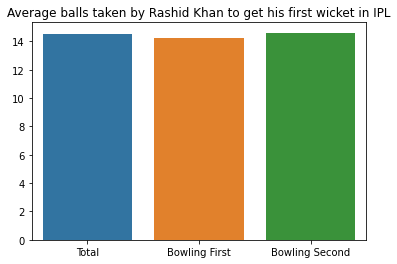

In [23]:
average_balls = pd.Series([avg_ball_overall,avg_ball_overall_bowling_first,avg_ball_overall_bowling_second],index = ['Total','Bowling First','Bowling Second'])
sns.barplot(x = average_balls.index , y = average_balls)
plt.title('Average balls taken by Rashid Khan to get his first wicket in IPL')
plt.show()

Rashid Khan took more or less 14 balls to take his first wicket in IPL.

## How will David Warner get out:

In [24]:
delivery[delivery['batsman']=='DA Warner']['match_id'].unique()

array([  461,   487,   529,   558, 11144, 11336], dtype=int64)

Warner played 6 matches against Rajasthan and for Hyderabad.

In [25]:
total_dismissal_Warner = delivery[delivery['player_dismissed'] == 'DA Warner']['dismissal_kind'].value_counts(normalize=True)*100
total_dismissal_Warner

caught     66.666667
run out    16.666667
stumped    16.666667
Name: dismissal_kind, dtype: float64

David Warner got out by caught 66% times against Rajasthan.

In [26]:
total_dismissal_Warner_batting_first = delivery[(delivery['player_dismissed'] == 'DA Warner') & (delivery['inning'] == 1)]['dismissal_kind'].value_counts(normalize=True)*100
total_dismissal_Warner_batting_first

caught     60.0
run out    20.0
stumped    20.0
Name: dismissal_kind, dtype: float64

David Warner got out by caught 66% times against Rajasthan while batting first.

In [27]:
total_dismissal_Warner_batting_second = delivery[(delivery['player_dismissed'] == 'DA Warner') & (delivery['inning'] == 2)]['dismissal_kind'].value_counts(normalize=True)*100
total_dismissal_Warner_batting_second

caught    100.0
Name: dismissal_kind, dtype: float64

David Warner got out by caught all the times against Rajasthan while batting second.

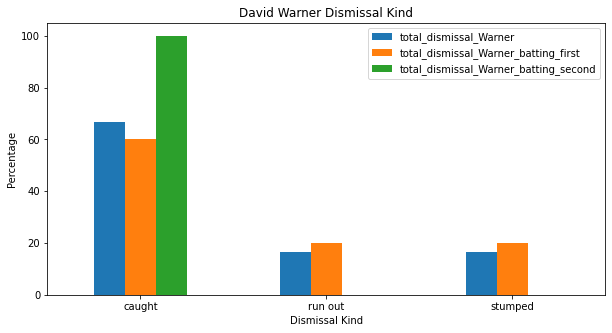

In [28]:
df = pd.DataFrame({"total_dismissal_Warner":total_dismissal_Warner,"total_dismissal_Warner_batting_first":total_dismissal_Warner_batting_first,'total_dismissal_Warner_batting_second':total_dismissal_Warner_batting_second})
ax = df.plot.bar(rot=0, title="David Warner Dismissal Kind",figsize=(10,5))
ax.set_xlabel("Dismissal Kind")
ax.set_ylabel("Percentage")
plt.show()

So we can see David Warner got out most of the time by caught against Rajasthan.

In [29]:
total_dismissal_Warner_overall = df1[df1['player_dismissed'] == 'DA Warner']['dismissal_kind'].value_counts(normalize=True)*100
total_dismissal_Warner_overall

caught               62.727273
bowled               20.909091
run out               5.454545
stumped               4.545455
lbw                   3.636364
caught and bowled     1.818182
hit wicket            0.909091
Name: dismissal_kind, dtype: float64

David Warner got out by caught 62% times in overall IPL.

In [30]:
total_dismissal_Warner_overall_batting_first = df1[(df1['player_dismissed'] == 'DA Warner') & (df1['inning']==1)]['dismissal_kind'].value_counts(normalize=True)*100
total_dismissal_Warner_overall_batting_first

caught               62.711864
bowled               23.728814
run out               5.084746
stumped               5.084746
lbw                   1.694915
caught and bowled     1.694915
Name: dismissal_kind, dtype: float64

David Warner got out by caught 62% times in overall IPL while batting first.

In [31]:
total_dismissal_Warner_overall_batting_second = df1[(df1['player_dismissed'] == 'DA Warner') & (df1['inning']==2)]['dismissal_kind'].value_counts(normalize=True)*100
total_dismissal_Warner_overall_batting_second

caught               62.0
bowled               18.0
lbw                   6.0
run out               6.0
stumped               4.0
caught and bowled     2.0
hit wicket            2.0
Name: dismissal_kind, dtype: float64

David Warner got out by caught 62% times in overall IPL while batting second.

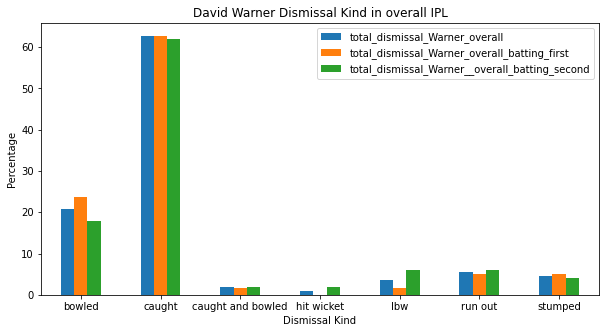

In [32]:
df = pd.DataFrame({"total_dismissal_Warner_overall":total_dismissal_Warner_overall,"total_dismissal_Warner_overall_batting_first":total_dismissal_Warner_overall_batting_first,'total_dismissal_Warner__overall_batting_second':total_dismissal_Warner_overall_batting_second})
ax = df.plot.bar(rot=0, title="David Warner Dismissal Kind in overall IPL",figsize=(10,5))
ax.set_xlabel("Dismissal Kind")
ax.set_ylabel("Percentage")
plt.show()

So we can see David Warner got out most of the time by caught in overall IPL.

## Who will score the most runs for RR in the match:

In [33]:
ids

[7897, 11144, 416, 449, 455, 461, 487, 529, 558, 7921, 11336]

In [34]:
batsman_name = delivery[(delivery['match_id']==11144) & (delivery['batting_team'] == 'Rajasthan Royals')].groupby('batsman')['batsman_runs'].sum().idxmax()
run = delivery[(delivery['match_id']==11144) & (delivery['batting_team'] == 'Rajasthan Royals')].groupby('batsman')['batsman_runs'].sum().max()
run

106

In [35]:
batsman_list = []
run_list = []
for i in ids:
    batsman_name = delivery[(delivery['match_id']==i) & (delivery['batting_team'] == 'Rajasthan Royals')].groupby('batsman')['batsman_runs'].sum().idxmax()
    run = delivery[(delivery['match_id']==i) & (delivery['batting_team'] == 'Rajasthan Royals')].groupby('batsman')['batsman_runs'].sum().max()
    batsman_list.append(batsman_name)
    run_list.append(run)
highest_scored_batsman_rajasthan = pd.DataFrame({'Batsman':batsman_list,'Run':run_list}, index = ids).sort_values('Run',ascending=False)
highest_scored_batsman_rajasthan

Batsman  Run
11144  SV Samson  106
416    SR Watson   98
558    SPD Smith   68
7921   AM Rahane   66
529    AM Rahane   62
461    AM Rahane   59
455     BJ Hodge   54
11336  SV Samson   53
7897   SV Samson   51
449    KK Cooper   26
487    SPD Smith   22

These are the highst scorers of Rajasthan against Hyderabad match.

In [36]:
highest_scored_batsman_rajasthan['Batsman'].value_counts()

AM Rahane    3
SV Samson    3
SPD Smith    2
KK Cooper    1
BJ Hodge     1
SR Watson    1
Name: Batsman, dtype: int64

In [37]:
highest_scored_batsman_rajasthan['Batsman'].value_counts().plot(kind='bar',figsize=(10,5))
plt.show()

SV Samson scored the highest score of Rajasthan three times whereas SPD Smith scored 2 times. AM Rahane is not with team in this year.

In [38]:
batsman_list = []
run_list = []
total_ids = df1[df1['batting_team']=='Rajasthan Royals']['match_id'].unique()
for i in total_ids:
    batsman_name = df1[(df1['match_id']==i) & (df1['batting_team'] == 'Rajasthan Royals')].groupby('batsman')['batsman_runs'].sum().idxmax()
    run = df1[(df1['match_id']==i) & (df1['batting_team'] == 'Rajasthan Royals')].groupby('batsman')['batsman_runs'].sum().max()
    batsman_list.append(batsman_name)
    run_list.append(run)
highest_scored_batsman_rajasthan_overall = pd.DataFrame({'Batsman':batsman_list,'Run':run_list}, index = total_ids).sort_values('Run',ascending=False)
highest_scored_batsman_rajasthan_overall

Batsman  Run
11331   AM Rahane  108
11144   SV Samson  106
570     SR Watson  104
326     AM Rahane  103
410     SR Watson  101
...           ...  ...
471     SR Watson   24
168       NV Ojha   22
487     SPD Smith   22
251    AL Menaria   21
119     RA Jadeja   11

[146 rows x 2 columns]

These are the highst scorers of Rajasthan in overall IPL.

In [39]:
highest_scored_batsman_rajasthan_overall['Batsman'].value_counts()

AM Rahane          21
SR Watson          17
SV Samson          12
R Dravid           10
JC Buttler          9
YK Pathan           8
GC Smith            6
BJ Hodge            6
SPD Smith           6
NV Ojha             5
KK Nair             4
RA Jadeja           4
J Botha             4
OA Shah             3
SA Asnodkar         3
BA Stokes           3
AL Menaria          3
Niraj Patel         2
R Parag             2
JP Faulkner         2
LRPL Taylor         2
AA Jhunjhunwala     2
RA Tripathi         2
DJ Hooda            1
D Short             1
AC Voges            1
KK Cooper           1
AP Dole             1
MJ Lumb             1
AS Raut             1
RJ Quiney           1
LA Carseldine       1
DS Kulkarni         1
Name: Batsman, dtype: int64

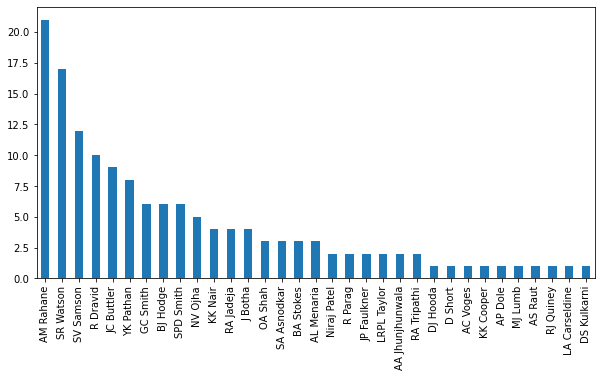

In [40]:
highest_scored_batsman_rajasthan_overall['Batsman'].value_counts().plot(kind='bar',figsize=(10,5))
plt.show()

AM Rahane scored more highest score for the team but unfortunately he left the Rajasthan Franchise. The following players who scored highest runs for Rajasthan in a match in overall IPL and with this franchise this year also:
1. SV Samson      12 times
2. JK Buttler      9 times
3. SPD Smith       6 times
4. BA Stokes       3 times

## How many no balls will be bowled in the match:

In [41]:
total_no_balls = delivery['noball_runs'].sum()
total_no_balls

3

Total 3 no balls were bowled.

In [42]:
noballs_by_Hyderabad = delivery[delivery['bowling_team'] == 'Sunrisers Hyderabad']['noball_runs'].sum()
noballs_by_Hyderabad

1

Hyderabad bowled only 1 no ball against Rajasthan.

In [43]:
noballs_by_Rajasthan = delivery[delivery['bowling_team'] != 'Sunrisers Hyderabad']['noball_runs'].sum()
noballs_by_Rajasthan

2

Rajasthan bowled only 2 no balls against Hyderabad.

In [44]:
avg_noballs = (total_no_balls/len(ids))
avg_noballs

0.2727272727272727

There is less than 1 no ball in an average per match.

In [45]:
noballs_bowling_first = delivery[delivery['inning'] == 1]['noball_runs'].sum()
noballs_bowling_first

2

Team bowled 2 no balls while bowling first.

In [46]:
avg_noballs_bowling_first = (noballs_bowling_first/len(ids))
avg_noballs_bowling_first

0.18181818181818182

There is less than 1 no ball in an average per match by team bowling first.

In [47]:
noballs_bowling_second = delivery[delivery['inning'] == 2]['noball_runs'].sum()
noballs_bowling_second

1

Team bowled 2 no balls while bowling second.

In [48]:
avg_noballs_bowling_second = (noballs_bowling_second/len(ids))
avg_noballs_bowling_second

0.09090909090909091

There is very less chances of no ball in an average per match by team bowling second.

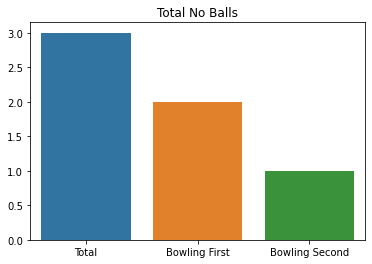

In [49]:
total_noballs_per_match = pd.Series([total_no_balls,noballs_bowling_first,noballs_bowling_second],index=['Total','Bowling First','Bowling Second'])
sns.barplot(x = total_noballs_per_match.index , y = total_noballs_per_match)
plt.title('Total No Balls')
plt.show()

there is very less chances of no ball in the match between Hyderabad and Rajsathan